<a href="https://colab.research.google.com/github/ram-shankar58/Anamoly-detector/blob/main/implementations/ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Upload your CSV file
from google.colab import files
uploaded = files.upload()


Saving India_GDP_Data.csv to India_GDP_Data (4).csv


In [ ]:
print(uploaded.keys())


dict_keys(['India_GDP_Data (4).csv'])


In [ ]:
# Load your data into a pandas DataFrame
df = pd.read_csv(io.BytesIO(uploaded['India_GDP_Data (4).csv']))
df['Year'] = pd.to_datetime(df['Year'], format='%Y')



In [ ]:
# Assuming 'Percentage_Growth' is the column on which you want to perform anomaly detection
series = df['Percentage_Growth ']

# Fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit()

In [ ]:
yhat = model_fit.predict(start=0, end=len(series)-1, typ='levels')


# Calculate residuals
residuals = [series[i]-yhat[i] for i in range(len(series))]
residuals = pd.DataFrame(residuals)

In [ ]:
# Calculate statistics on the residuals to find anomalies
residuals_std = residuals.std()
residuals_mean = residuals.mean()


In [ ]:
# Any data point that deviates significantly from the mean could be considered an anomaly.
anomalies = residuals[(residuals - residuals_mean).abs() > 1*residuals_std]

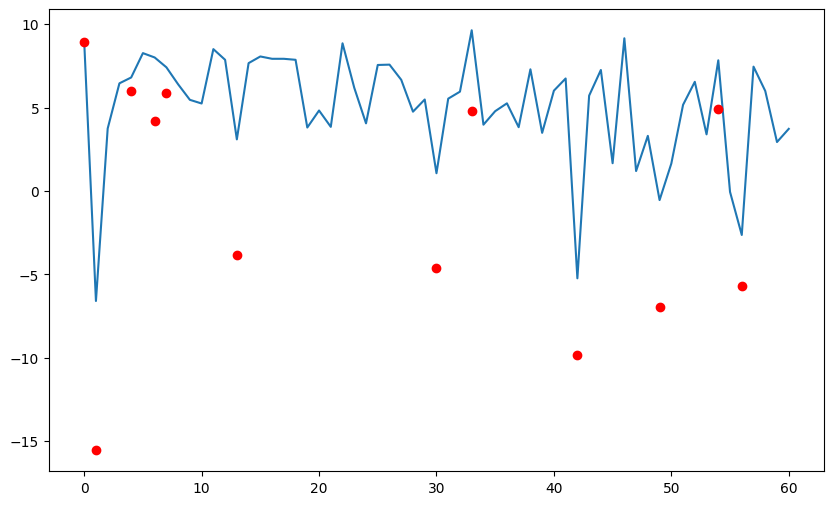

In [ ]:
# Plot data and anomalies
plt.figure(figsize=(10,6))
plt.plot(series)
plt.plot(anomalies, 'ro')
plt.show()
